In [2]:
import konlpy
import pandas as pd
import numpy as np 
import re

In [3]:
df = pd.read_csv('data/인스타해시태그_밥.csv')

In [4]:
df.head()

,dates,tags
0,2021-08-04,NaN
1,2021-07-13,"아침식사,피마자,나물남편은"
2,2021-08-05,"직장살림인,저녁밥,아보카도,불고기덮밥,일상,데일리,daily,food..."
3,2021-08-01,"福島市,完熟ラーメン本丸,徳島風中華そば,水曜軒,ラーメン,ramen,🍜,밥"
4,2021-08-05,NaN


In [5]:
del df['dates']

In [6]:
df.head()

,tags
0,NaN
1,"아침식사,피마자,나물남편은"
2,"직장살림인,저녁밥,아보카도,불고기덮밥,일상,데일리,daily,food..."
3,"福島市,完熟ラーメン本丸,徳島風中華そば,水曜軒,ラーメン,ramen,🍜,밥"
4,NaN


In [7]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub(' ', str(text))
    return result

df['ko_text'] = df['tags'].apply(lambda x : text_cleaning(x))
df.head(10)

,tags,ko_text
0,NaN,
1,"아침식사,피마자,나물남편은",
2,"직장살림인,저녁밥,아보카도,불고기덮밥,일상,데일리,daily,food...",직장살림인 저녁밥 아보카도 불고기덮밥 퇴근후
3,"福島市,完熟ラーメン本丸,徳島風中華そば,水曜軒,ラーメン,ramen,🍜,밥",
4,NaN,
5,"okinawa,girls,car,coffee,starbucks,chocolate,c...",친구 밥 커피
6,NaN,
7,"집밥,온더테이블,가정식,한식,요리,요리하는여자,밥하는여자,홈쿡,간단메뉴,원플레이트,...",집밥 온더테이블 가정식 한식 요리 요리하는여자 밥하는여자 홈쿡 간단메뉴 원플레이트 ...
8,"instfood,instalove,instagood,food,ランチ,일본,ᄇ...",
9,"서지니,아기변비,눈물뚝뚝,힘들었지ㅠㅠ,변비탈출,우유를너무많이먹음안되여,물마니,야채,...",서지니 아기변비 눈물뚝뚝 힘들었지ㅠㅠ 변비탈출 우유를너무많이먹음안되여 물마니 야채 ...


In [8]:
for i in range(len(df['ko_text'])):
    if len(df['ko_text'][i]) == 0:
        df = df.drop(index=i)

In [9]:
from konlpy.tag import Okt
from collections import Counter

In [128]:
stopwords = ['그램','스타','팔로워','선팔','팔로우','판매','반사','오늘','소통','맞팔','여우','털','디','치킨','삼겹살','라떼','아이스크림','모유','수유','애기','계란','배고파',
             '개','보신','탕','임신','밥스','우유','요거트','치즈','피자','몸보신','코트','패딩','울','앙고라','니트','라쿤','공고','보호','보신탕','모유수유','털패딩','개고기',
             '성애자','맛스타','구로','환영','타워','홈쿡','몸','소','안락사','밥','데','난후']

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    #불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

# 'ko_text' 피처에 적용
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(1000, 3)


,tags,ko_text,nouns
0,NaN,,[]
1,"아침식사,피마자,나물남편은",,[]
2,"직장살림인,저녁밥,아보카도,불고기덮밥,일상,데일리,daily,food...",직장살림인 저녁밥 아보카도 불고기덮밥 퇴근후,"[직장, 살림, 저녁밥, 아보카도, 불고기, 퇴근, 후]"
3,"福島市,完熟ラーメン本丸,徳島風中華そば,水曜軒,ラーメン,ramen,🍜,밥",,[]
4,NaN,,[]


In [129]:
df.head(20)

,tags,ko_text,nouns
0,NaN,,[]
1,"아침식사,피마자,나물남편은",,[]
2,"직장살림인,저녁밥,아보카도,불고기덮밥,일상,데일리,daily,food...",직장살림인 저녁밥 아보카도 불고기덮밥 퇴근후,"[직장, 살림, 저녁밥, 아보카도, 불고기, 퇴근, 후]"
3,"福島市,完熟ラーメン本丸,徳島風中華そば,水曜軒,ラーメン,ramen,🍜,밥",,[]
4,NaN,,[]
5,"okinawa,girls,car,coffee,starbucks,chocolate,c...",친구 밥 커피,"[친구, 커피]"
6,NaN,,[]
7,"집밥,온더테이블,가정식,한식,요리,요리하는여자,밥하는여자,홈쿡,간단메뉴,원플레이트,...",집밥 온더테이블 가정식 한식 요리 요리하는여자 밥하는여자 홈쿡 간단메뉴 원플레이트 ...,"[집밥, 더, 테이블, 가정식, 한식, 요리, 요리, 여자, 여자, 간단, 메뉴, ..."
8,"instfood,instalove,instagood,food,ランチ,일본,ᄇ...",,[]
9,"서지니,아기변비,눈물뚝뚝,힘들었지ㅠㅠ,변비탈출,우유를너무많이먹음안되여,물마니,야채,...",서지니 아기변비 눈물뚝뚝 힘들었지ㅠㅠ 변비탈출 우유를너무많이먹음안되여 물마니 야채 ...,"[서지, 아기, 변비, 눈물, 뚝뚝, 변비, 탈출, 먹음, 물, 야채, 미역국]"


In [130]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.

In [131]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [132]:
from collections import Counter

In [133]:
count = Counter(ex_list)
count

Counter({'직장': 4,
         '살림': 6,
         '저녁밥': 35,
         '아보카도': 6,
         '불고기': 16,
         '퇴근': 8,
         '후': 9,
         '친구': 11,
         '커피': 10,
         '집밥': 227,
         '더': 18,
         '테이블': 19,
         '가정식': 13,
         '한식': 45,
         '요리': 228,
         '여자': 25,
         '간단': 12,
         '메뉴': 102,
         '플레이': 7,
         '트': 7,
         '책방': 2,
         '솥밥': 5,
         '올리브': 11,
         '모두': 3,
         '체리': 2,
         '뇰': 2,
         '음식사진': 14,
         '서지': 1,
         '아기': 24,
         '변비': 2,
         '눈물': 1,
         '뚝뚝': 1,
         '탈출': 2,
         '먹음': 2,
         '물': 9,
         '야채': 18,
         '미역국': 9,
         '저녁': 165,
         '두부': 20,
         '구이': 38,
         '샐러드': 21,
         '양상추': 2,
         '떡갈비': 7,
         '원기': 6,
         '회복': 6,
         '오이': 12,
         '노지': 6,
         '캠퍼': 6,
         '캠핑': 20,
         '양산': 14,
         '횟집': 18,
         '도매': 12,
         '등린': 4,
       

In [134]:
words = dict(count.most_common())
words

{'맛집': 346,
 '요리': 228,
 '집밥': 227,
 '일상': 189,
 '저녁': 165,
 '점심': 145,
 '식단': 140,
 '음식': 127,
 '먹방': 121,
 '밥상': 113,
 '메뉴': 102,
 '김밥': 88,
 '아침밥': 79,
 '식사': 74,
 '푸드': 71,
 '반찬': 60,
 '아침': 60,
 '도시락': 56,
 '자취': 50,
 '집': 48,
 '볶음': 48,
 '한식': 45,
 '엄마': 45,
 '일리': 44,
 '천원': 43,
 '팔': 42,
 '끼': 42,
 '추천': 39,
 '라면': 39,
 '구이': 38,
 '일기': 38,
 '다이어트': 37,
 '뭐': 36,
 '저녁밥': 35,
 '고기': 35,
 '김치': 34,
 '카레': 33,
 '기록': 32,
 '육아': 32,
 '방배': 31,
 '홈': 30,
 '여행': 30,
 '미미': 30,
 '김': 29,
 '야식': 29,
 '맛': 28,
 '카페': 28,
 '강아지': 28,
 '건강': 28,
 '쌀': 28,
 '한국': 28,
 '센트럴': 28,
 '파크': 28,
 '돈까스': 27,
 '쿡스': 26,
 '소고기': 26,
 '냥': 26,
 '넷마블': 26,
 '사옥': 26,
 '여자': 25,
 '여름': 25,
 '아들': 25,
 '떡볶이': 25,
 '아기': 24,
 '살': 24,
 '맘': 24,
 '레시피': 24,
 '인스타': 24,
 '직장인': 24,
 '인친': 24,
 '아빠': 24,
 '웃음': 24,
 '반': 23,
 '존맛': 23,
 '샐러드': 21,
 '볶음밥': 21,
 '안주': 21,
 '찌개': 21,
 '간식': 21,
 '닭': 21,
 '배달': 21,
 '두부': 20,
 '캠핑': 20,
 '휴가': 20,
 '장어': 20,
 '행복': 20,
 '파스타': 20,
 '술': 20,
 '사랑': 20,
 '식판': 

In [135]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [136]:
import nltk

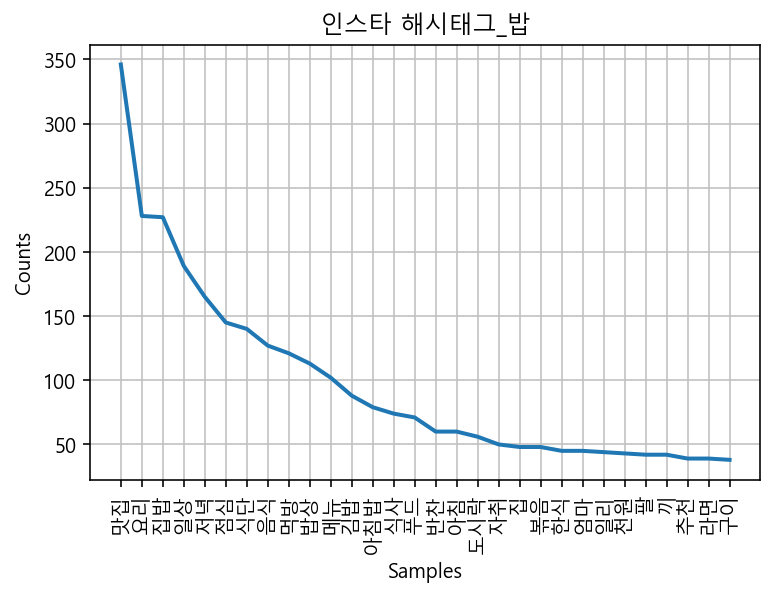

In [140]:
bab = nltk.Text(ex_list)
plt.figure()
plt.title('인스타 해시태그_밥')
bab.plot(30)
plt.show()

### 워드클라우드

In [138]:
import wordcloud

#이미지 불러와서 사용할 것
from PIL import Image  

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

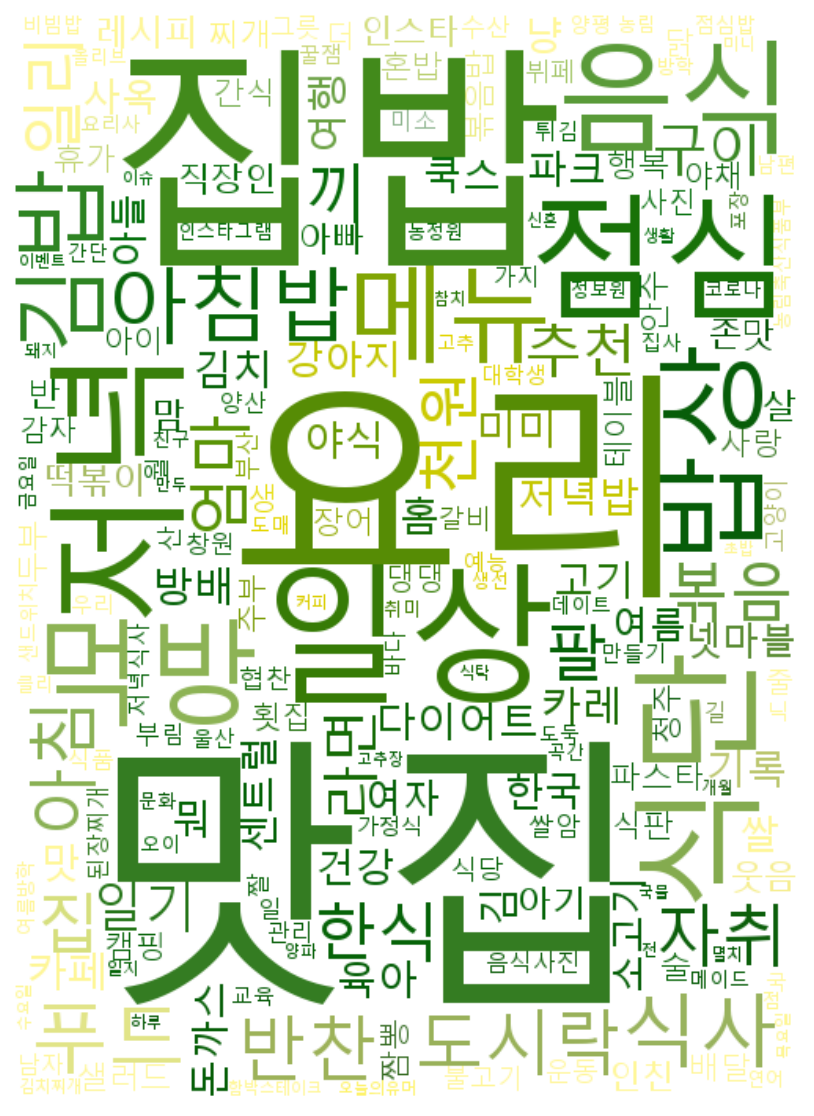

<Figure size 432x288 with 0 Axes>

In [139]:
# 특정이미지1 이용 워드클라우드 생성
img = np.array(Image.open('image/잘살아보세.png'))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                                    background_color="white", mask=img).generate_from_frequencies(words)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()
plt.savefig("인스타_밥_워드클라우드.png") #이미지 파일로 저장